In [1]:
import os

import copy
"""
Assignment statements in Python do not copy objects!
they create bindings between a target and an object.
a copy is sometimes needed so one can change one copy without changing the other!
"""
from pathlib import Path

import scipy

import krotov

import numpy as np
import qutip

import matplotlib
import matplotlib.pyplot as plt

#import colorsys
#from mpl_toolkits.mplot3d import Axes3D

import re
# get numbers from string

import qdyn.model
import qdyn.pulse
# QDYN-pylib is a Python package for interacting with the Fortran QDYN library and tools
#!make clean

from multiprocessing import Pool

from qutip import tensor,qeye,ket

import subprocess as subp

In [2]:
%matplotlib widget

In [3]:
# Plot pulses

def plot_pulse(pulse, tlist, xlimit=None):
    fig, ax = plt.subplots()
    if callable(pulse):
        pulse = np.array([pulse(t, None) for t in tlist])
    ax.plot(tlist, pulse)
    ax.set_xlabel('time (ns)')
    ax.set_ylabel('pulse amplitude')
    if xlimit is not None:
        ax.set_xlim(xlimit)
    plt.show(fig)

# Thank god for the nice person, that created this piece of artwork
def parse(filename, sep='|'):
    all_items = []
    with open(filename) as source:
        for line in source:
            row_items = []
            for item in line.split(sep):
                row_items.append(item.strip())
            all_items.append(row_items)
    return all_items

def read_headline(filename):
    L = parse(filename)
    
    headline = L[0]
    
    return headline
    
    
def get_oct_infid_pulse(filename):
    headline_list = read_headline(filename)
    # headline_list is a 'list' of length 1, get first element 'headline'
    
    headline = headline_list[0]
    # headline is a string, that contains OCT_iter, J_T, pulse_id
    # convert string into float
   # print(headline)
    
    all_numbers = re.findall(r'\d+',headline)
    # all_numbers is a LIST OF STRINGS
    #the zeroth element is the OCT_iter,
    # the first,second,third entry are the infidelity e.g. [OCT_iter, 9(erste zahl vorm komma), 9999... (nachkommastellen), 05 (power), 1 (pulse_id)]
    # the fifth entry is the pulse_id
    
    # 1. GET OCT_ITER, get 0th element of ALL NUMBERS, TRANSFORM to INT
    OCT_iter = int(all_numbers[0])
    
    
    
    # 2. GET INFIDELITY
    #infidelity is a float point number, get float point number !
    
    regex = '[+-]?[0-9]+\.[0-9]+'
    
    infid_list = re.findall(regex,headline)
    
    # 'infid_list' is a list containing the infidelity as a string WITHOUT its power/potenz 'E-5'
    
    # Get the CORRECT POWER from all_numbers
    power = int(all_numbers[-2])
    
    # infid is the infidelity
    infid = float(infid_list[0])*10**(-power)
    
    
    #3. GET PULSE ID
    pulse_id = int(all_numbers[-1])
    
    

    return [OCT_iter, infid,pulse_id]
    
    
    
#get_fid(v)
#get_oct_infid_pulse("rf10/pulse1.oct.dat")


In [4]:
def get_numbers_from_runfolders(start, end):
    OCT_iter_list = []
    infid_list = []
    times_list = []
    
    for i in range(start,end+1):
        #rf_p = "Offspring2/" + "rf" + str(i)
        rf_p =  "rf" + str(i)
        if not os.path.isdir(rf_p):
            #print('Runfolder '+rf_p + ' does NOT exist!')
            continue
        oct_infid_pulse = get_oct_infid_pulse(rf_p + "/pulse1.oct.dat" )
        times_list.append(i)
        
        # sort_numbers_from_runfolders
        [OCT_iter,infid,pulse_id] = oct_infid_pulse
        OCT_iter_list.append(OCT_iter)
        infid_list.append(infid)
        
    return times_list,OCT_iter_list, infid_list
    

def plot_infidelity_curve(times,infid):
    fig, ax = plt.subplots()
    ax.plot(times, infid,'ro')
    #plt.plot(times,infid,'ro')
    plt.xlabel('Gate Duration in ns')
    plt.yscale('log')
    plt.ylabel('Gate Error')
    plt.show()

def plot_iterations_curve(times,OCT_iter):
    fig, ax = plt.subplots()
    ax.plot(times,OCT_iter,"go")
    #plt.plot(times,OCT_iter,'go')
    plt.xlabel('Gate Duration - Final Time Optimizations')
    #plt.yscale('log')
    plt.ylabel('Iterations')
    plt.show()

In [5]:
times,OCT_iter, infid = get_numbers_from_runfolders(1, 10)

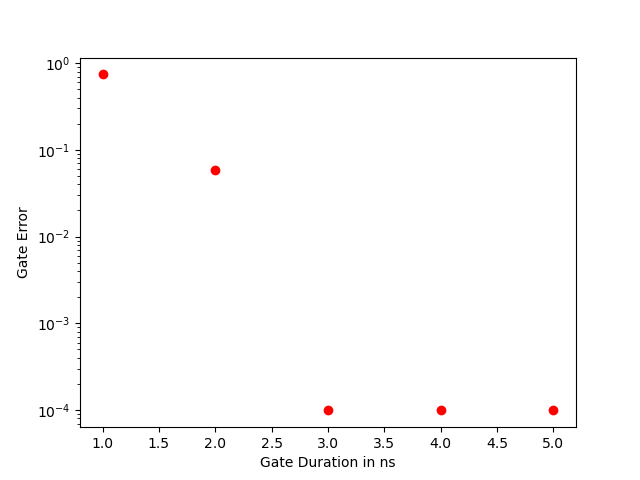

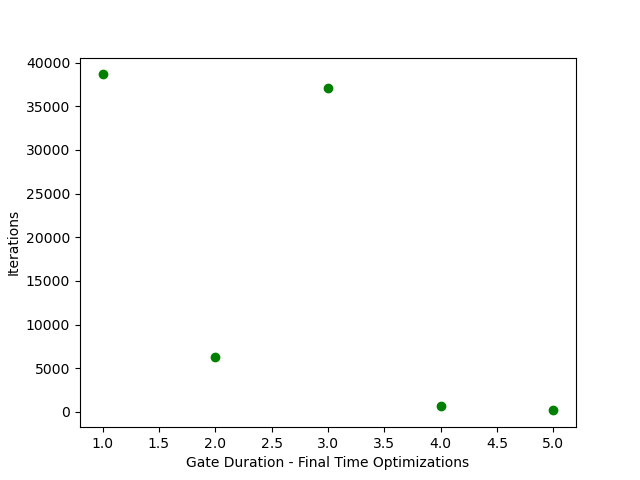

(None, None)

In [6]:
plot_infidelity_curve(times,infid), plot_iterations_curve(times,OCT_iter)